In [29]:
pip install pandas numpy textblob matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import re # Regular expression library for text cleaning
import string # For punctuation handling

# NLTK for natural language processing tasks
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis

# Scikit-learn for machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Download necessary NLTK data (run once)
# Directly call nltk.download() for each required corpus to ensure they are available.
# Using quiet=True to suppress verbose output if already downloaded.
print("Checking and downloading NLTK data...")
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)
print("NLTK data download check complete.")

Checking and downloading NLTK data...
NLTK data download check complete.


In [32]:
# --- Section 2: Data Exploration and Preprocessing ---
# This section loads the dataset, performs initial exploratory data analysis (EDA),
# and preprocesses the text data for machine learning.

# Load the dataset
try:
    df = pd.read_csv('blogs.csv') # Assuming 'blogs.csv' is the correct filename
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'blogs.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the file is not found

Dataset loaded successfully.


In [33]:
# Rename columns as per assignment brief for clarity
df.rename(columns={'Data': 'Text', 'Labels': 'Category'}, inplace=True)

In [34]:
# Display basic information about the dataset
print("\n--- Dataset Information ---")
df.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2000 non-null   object
 1   Category  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [35]:
# Display the first few rows of the dataset
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())


--- First 5 Rows of the Dataset ---
                                                Text     Category
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [36]:
# Display descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))


--- Descriptive Statistics ---
                                                     Text     Category
count                                                2000         2000
unique                                               2000           20
top     Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  alt.atheism
freq                                                    1          100


In [37]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Text        0
Category    0
dtype: int64


In [38]:
# Check the distribution of categories
print("\n--- Distribution of Blog Categories ---")
print(df['Category'].value_counts())


--- Distribution of Blog Categories ---
Category
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8024\1009707094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


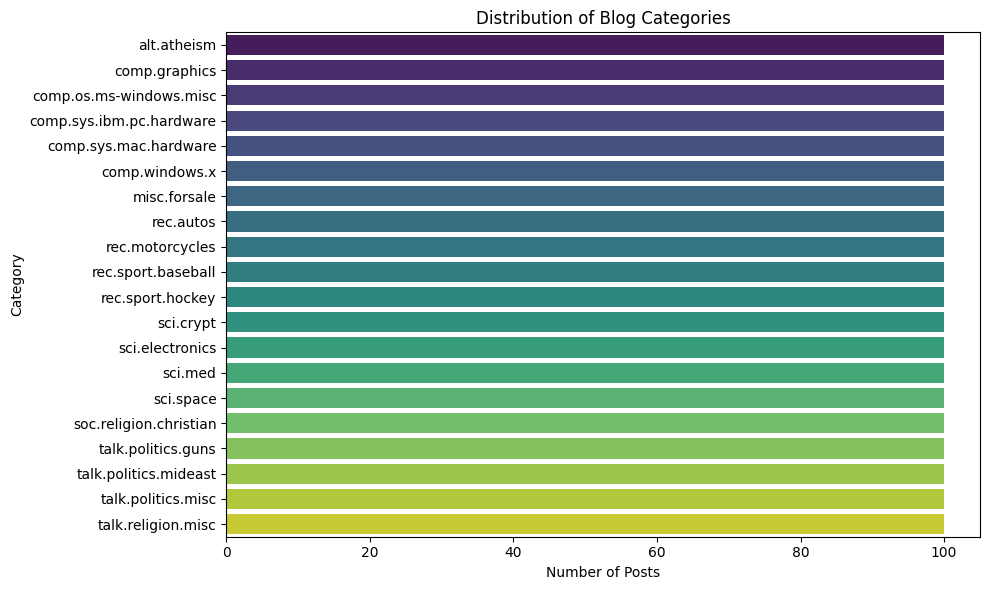

In [39]:
# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Distribution of Blog Categories')
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [40]:
# --- Text Preprocessing Function ---
# This function cleans text data by performing several steps:
# 1. Lowercasing: Converts all text to lowercase.
# 2. Punctuation Removal: Removes all punctuation marks.
# 3. Tokenization: Splits text into individual words.
# 4. Stopword Removal: Eliminates common words that don't carry much meaning (e.g., 'the', 'is').
# 5. Lemmatization: Reduces words to their base form (e.g., 'running' -> 'run').

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str): # Handle potential non-string entries
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return " ".join(filtered_tokens)

In [41]:
# 5. Lemmatization: Reduces words to their base form (e.g., 'running' -> 'run').

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str): # Handle potential non-string entries
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return " ".join(filtered_tokens)

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - '.'
**********************************************************************
